Importing and formatting data

Import MNIST dataset of 60,000 training images and 10,000 testing images

In [1]:
import tensorflow as tf
physical_devices = tf.config.list_physical_devices('GPU') 
tf.config.experimental.set_memory_growth(physical_devices[0], True)

# For drawing the MNIST digits as well as plots to help us evaluate performance we
# will make extensive use of matplotlib
from matplotlib import pyplot as plt

# All of the Keras datasets are in keras.datasets
from tensorflow.keras.datasets import mnist

# Keras has already split the data into training and test data
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

# Training images is a list of 60,000 2D lists.
# Each 2D list is 28 by 28—the size of the MNIST pixel data.
# Each item in the 2D array is an integer from 0 to 255 representing its grayscale
# intensity where 0 means white, 255 means black.
print(len(training_images), training_images[0].shape)

# training_labels are a value between 0 and 9 indicating which digit is represented.
# The first item in the training data is a 5
print(len(training_labels), training_labels[0])


60000 (28, 28)
60000 5


Visualize the first 100 images in the dataset

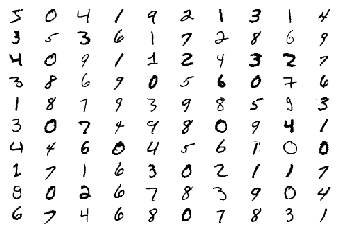

In [2]:
# Lets visualize the first 100 images from the dataset
for i in range(100):
    ax = plt.subplot(10, 10, i+1)
    ax.axis('off')
    plt.imshow(training_images[i], cmap='Greys')

Fixing the data format: using `numpy.reshape` and `keras.util.to_categorical`

In [3]:
from tensorflow.keras.utils import to_categorical

# Preparing the dataset
# Setup train and test splits
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()


# 28 x 28 = 784, because that's the dimensions of the MNIST data.
image_size = 784

# Reshaping the training_images and test_images to lists of vectors with length 784
# instead of lists of 2D arrays. Same for the test_images
training_data = training_images.reshape(training_images.shape[0], image_size) 
test_data = test_images.reshape(test_images.shape[0], image_size)

# [
#     [1,2,3]
#     [4,5,6]
# ]

# => [1,2,3,4,5,6]

# Just showing the changes...
print("training data: ", training_images.shape, " ==> ", training_data.shape)
print("test data: ", test_images.shape, " ==> ", test_data.shape)

training data:  (60000, 28, 28)  ==>  (60000, 784)
test data:  (10000, 28, 28)  ==>  (10000, 784)


In [4]:
# Create 1-hot encoded vectors using to_categorical
num_classes = 10 # Because it's how many digits we have (0-9) 

# to_categorical takes a list of integers (our labels) and makes them into 1-hot vectors
training_labels = to_categorical(training_labels, num_classes)
test_labels = to_categorical(test_labels, num_classes)

In [5]:
# Recall that before this transformation, training_labels[0] was the value 5. Look now:
print(training_labels[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Sequential models are a series of layers applied linearly.
pyramid_model = Sequential()
# The first layer must specify it's input_shape.
# This is how the first two layers are added, the input layer and the hidden layer.
pyramid_model.add(Dense(units=8, activation='sigmoid', input_shape=(image_size,)))
pyramid_model.add(Dense(units=32, activation='sigmoid'))
pyramid_model.add(Dense(units=128, activation='sigmoid'))
pyramid_model.add(Dense(units=512, activation='sigmoid'))
# This is how the output layer gets added, the 'softmax' activation function ensures
# that the sum of the values in the output nodes is 1. Softmax is very
# common in classification networks. 
pyramid_model.add(Dense(units=num_classes, activation='softmax'))
# This function provides useful text data for our network
pyramid_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 6280      
_________________________________________________________________
dense_1 (Dense)              (None, 32)                288       
_________________________________________________________________
dense_2 (Dense)              (None, 128)               4224      
_________________________________________________________________
dense_3 (Dense)              (None, 512)               66048     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                5130      
Total params: 81,970
Trainable params: 81,970
Non-trainable params: 0
_________________________________________________________________


Compiling and training the model


In [7]:
# sgd stands for stochastic gradient descent.
# categorical_crossentropy is a common loss function used for categorical classification.
# accuracy is the percent of predictions that were correct.
pyramid_model.compile(optimizer="sgd", loss='categorical_crossentropy', metrics=['accuracy'])

# The network will make predictions for 128 flattened images per correction.
# It will make a prediction on each item in the training set 5 times (5 epochs)
# And 10% of the data will be used as validation data.
history = pyramid_model.fit(training_data, training_labels, batch_size=256, epochs=50, verbose=True, validation_split=.1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/50
54000/54000 [==============================] - 1s 28us/sample - loss: 2.3109 - accuracy: 0.1119 - val_loss: 2.3026 - val_accuracy: 0.1050
Epoch 2/50
54000/54000 [==============================] - 1s 16us/sample - loss: 2.3022 - accuracy: 0.1112 - val_loss: 2.3030 - val_accuracy: 0.1163
Epoch 3/50
54000/54000 [==============================] - 1s 16us/sample - loss: 2.3021 - accuracy: 0.1113 - val_loss: 2.3047 - val_accuracy: 0.1050s - loss: 2.3021 - accura
Epoch 4/50
54000/54000 [==============================] - 1s 15us/sample - loss: 2.3018 - accuracy: 0.1126 - val_loss: 2.3033 - val_accuracy: 0.1113
Epoch 5/50
54000/54000 [==============================] - 1s 16us/sample - loss: 2.3019 - accuracy: 0.1129 - val_loss: 2.3030 - val_accuracy: 0.1050
Epoch 6/50
54000/54000 [==============================] - 1s 16us/sample - loss: 2.3015 - accuracy: 0.1134 - val_loss: 2.3027 - val_accuracy: 0.1335
Epoch 7/50
54000/54000 [========

Evaluating our model

10000/10000 [==============================] - 1s 76us/sample - loss: 2.2618 - accuracy: 0.2091


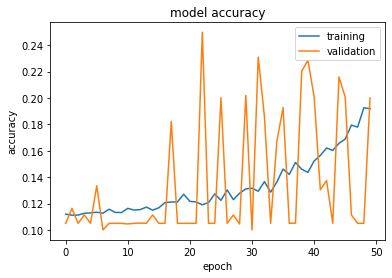

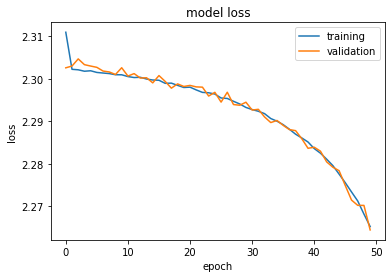

Test loss: 2.26
Test accuracy: 0.209
[0.111944444, 0.111185186, 0.11125926, 0.11257407, 0.11290741, 0.11340741, 0.11266667, 0.1157037, 0.11324074, 0.11318518, 0.11635185, 0.11503704, 0.11540741, 0.11727778, 0.115, 0.11677778, 0.12072222, 0.12112963, 0.12122222, 0.12705556, 0.12162963, 0.12116667, 0.11903704, 0.12072222, 0.12731482, 0.12240741, 0.13027778, 0.122944444, 0.12777779, 0.13105555, 0.13162963, 0.12931481, 0.1366111, 0.12862962, 0.13631481, 0.1460926, 0.14209259, 0.15109259, 0.14601852, 0.14361112, 0.15224074, 0.15648147, 0.16207407, 0.16025926, 0.16564815, 0.1687963, 0.1795, 0.17792593, 0.19253704, 0.19192593]
[0.105, 0.116333336, 0.105, 0.11133333, 0.105, 0.1335, 0.1, 0.105, 0.105, 0.105, 0.1045, 0.105, 0.105166666, 0.105, 0.11133333, 0.105, 0.105, 0.18233334, 0.105, 0.105, 0.105, 0.105, 0.24983333, 0.105, 0.105, 0.20016667, 0.105, 0.11133333, 0.1045, 0.202, 0.1, 0.231, 0.18583333, 0.105, 0.16716667, 0.19266666, 0.105, 0.105166666, 0.22033334, 0.2285, 0.201, 0.13033333, 0.13

In [8]:
loss, accuracy = pyramid_model.evaluate(test_data, test_labels, verbose=True)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')

plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')

plt.show()

print(f'Test loss: {loss:.3}')
print(f'Test accuracy: {accuracy:.3}')
print(history.history['accuracy'])
print(history.history['val_accuracy'])

Look at specific results

In [9]:
from numpy import argmax

# Predicting once, then we can use these repeatedly in the next cell without recomputing the predictions.
predictions = pyramid_model.predict(test_data)

# For pagination & style in second cell
page = 0
fontdict = {'color': 'black'}

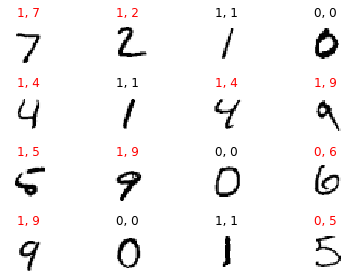

In [10]:
# Repeatedly running this cell will page through the predictions
for i in range(16):
    ax = plt.subplot(4, 4, i+1)
    ax.axis('off')
    plt.imshow(test_images[i + page], cmap='Greys')
    prediction = argmax(predictions[i + page])
    true_value = argmax(test_labels[i + page])

    fontdict['color'] = 'black' if prediction == true_value else 'red'
    plt.title("{}, {}".format(prediction, true_value), fontdict=fontdict)

page += 16
plt.tight_layout()
plt.show()